<a href="https://colab.research.google.com/github/Ragavendhra-Ramanan/Machine-Learning/blob/master/Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Task Overview**



*   Use the **Train.csv** file for fitting the models (Divide this file into training set and testing set).
*   Treat the **missing values** appropriately.
*   Convert the **categorical** data into numerical data appropriately, if necessary.
* **Normalize** the data, if required.
* Fit linear regression model and compute **RMSE** and **R-Square.**
* Apply **regularization** techniques on the data to check whether they are better than the basic linear model. Loop through various regularization parameters to display and compare R-Square.
* Fit the **residual plots** in all cases.




#**Load Dataset**

In [ ]:
#import relevant libraries
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
from scipy import stats
import seaborn as sns
from scipy.stats import norm
sns.set_style('darkgrid')

In [ ]:
#Load dataset
data=pd.read_csv('Train.csv')

In [ ]:
#show first 5 lines
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**Get to know features**


* **Item_Identifier**: Code given to items
* **Item_Weight**: Weight of an item
* **Item_Fat_Content**: Fat content of the item like low, high etc
* **Item_Visibility**: A continuous value indicating the visibility of the item for a customer
* **Item_Type**: Type of the item like dairy, vegetables etc
* **Item_MRP**: Maximum retail price of the item
* **Outlet_Identifier**: Code given to outlets
* **Outlet_Establishment_Year** : Year of establishment of an outlet
* **Outlet_Size:** Size of an outlet like medium, high etc.
* **Outlet_Location_Type**: Location of the outlet in a city like Tier1, 2 etc.
* **Outlet_Type**: Type of the outlet like supermarket, grocery shop etc.

* **Item_Outlet_Sales**: Sale value of an item in outlet. It is a **target** variable.

In [ ]:
#get shape of dataset
data.shape

(8523, 12)

In [ ]:
#get datatypes and count of each features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#**Exploring Numerical variables**

In [ ]:
#statistics of numerical variables
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
#print corr between numerical variables
data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


None of the feature are correlated hence we can take all the variables if correlation is found we should eliminate any one of the correlated variables

# **Univariate Analysis Check for distributions**

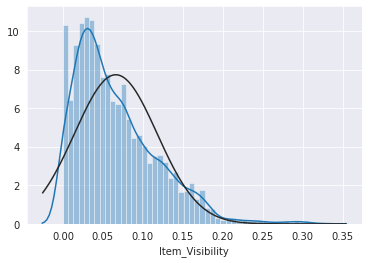

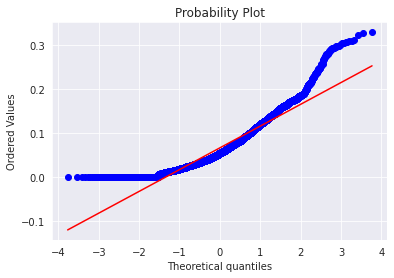

In [ ]:
#distplot for item visibility
sns.distplot(data['Item_Visibility'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['Item_Visibility'], plot=plt)

Item visibility is skewed hence we should transform it to make normal distribution

In [ ]:
#check skew by taking square root skew is small hence we apply the same
pd.Series(np.sqrt(data['Item_Visibility'])).skew()

-0.09805554671154018

In [ ]:
#applying squareroot
data['Item_Visibility']=pd.Series(np.sqrt(data['Item_Visibility']))

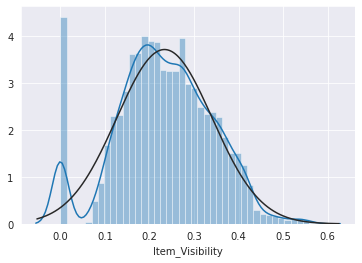

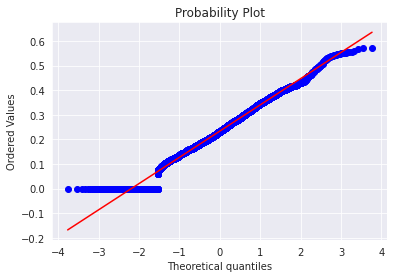

In [ ]:
#again check distribution
sns.distplot(data['Item_Visibility'], fit=norm);
fig = plt.figure()
res = stats.probplot(data['Item_Visibility'], plot=plt)

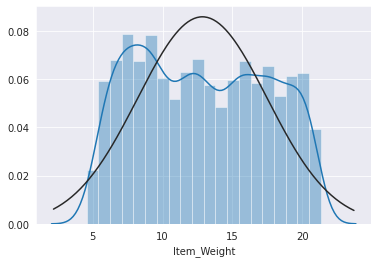

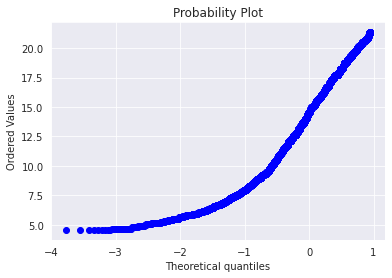

In [ ]:
#check distribution for item weight
sns.distplot(data['Item_Weight'], fit=norm)
fig = plt.figure()
res = stats.probplot(data['Item_Weight'], plot=plt)

In [ ]:
#check skew for item weight
pd.Series(data['Item_Weight']).skew()

0.0824262091221237

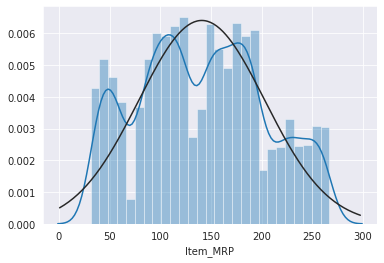

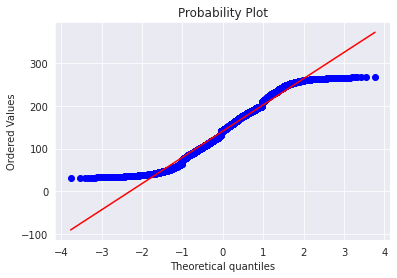

In [ ]:
#check distribution for item weight
sns.distplot(data['Item_MRP'], fit=norm)
fig = plt.figure()
res = stats.probplot(data['Item_MRP'], plot=plt)

In [ ]:
#check skew for item mrp
data['Item_MRP'].skew()

0.1272022683110526

# **Bivariate analysis**

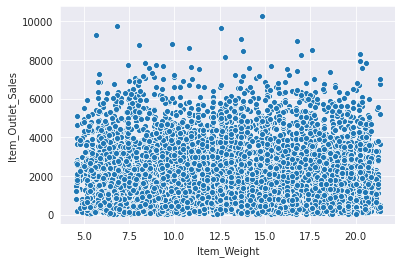

In [ ]:
#Item weight vs Item Outlet sales 
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',data=data)

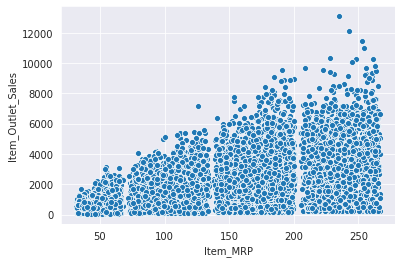

In [ ]:
#Item mrp vs Item Outlet sales 
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=data)

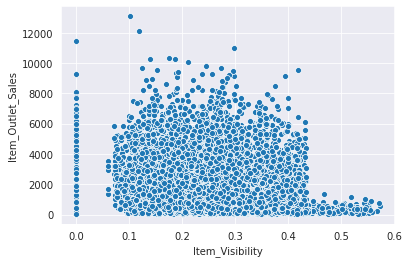

In [ ]:
#Item visibility vs Item Outlet sales 
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',data=data)

#**Exploring categorical variables**

In [ ]:
#check for categories in item fat content
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
#map the catogories to numbers
data=data.replace({'Item_Fat_Content':{'Low Fat':0,'Regular':1,'LF':0,'reg':1,'low fat':0}})

In [ ]:
#check
data['Item_Fat_Content'].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
#check for categories in item item identifier
data['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
FDT07     9
DRN47     9
NCL31     9
         ..
FDO33     1
DRF48     1
FDQ60     1
FDK57     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [ ]:
#check for categories in item fat content
data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
#Label encoder
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
data['Item_Type']= label_encoder.fit_transform(data['Item_Type']) 
  

In [ ]:
#check
data['Item_Type'].value_counts()

6     1232
13    1200
9      910
5      856
4      682
3      649
0      648
8      520
14     445
10     425
1      251
7      214
11     169
15     148
2      110
12      64
Name: Item_Type, dtype: int64

In [ ]:
#check for categories in outlet identifier
data['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT035    930
OUT046    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [ ]:
#label encoder
from sklearn import preprocessing 
label_encoder1 = preprocessing.LabelEncoder() 
data['Outlet_Identifier']= label_encoder1.fit_transform(data['Outlet_Identifier']) 
  

In [ ]:
#check
data['Outlet_Identifier'].value_counts()

5    935
1    932
6    930
9    930
8    930
7    929
3    928
2    926
0    555
4    528
Name: Outlet_Identifier, dtype: int64

In [ ]:
#check outlet establishment year
data['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [ ]:
#check for categories in item outlet size
data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
#map the values
data=data.replace({'Outlet_Size':{'Medium':0,'Small':1,'High':2}})

In [ ]:
#check
data['Outlet_Size'].value_counts()

0.0    2793
1.0    2388
2.0     932
Name: Outlet_Size, dtype: int64

In [ ]:
#check for categories in outlet location type 
data['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [ ]:
#map for the values
data=data.replace({'Outlet_Location_Type':{'Tier 1':0,'Tier 2':1,'Tier 3':2}})

In [ ]:
#check
data['Outlet_Location_Type'].value_counts()

2    3350
1    2785
0    2388
Name: Outlet_Location_Type, dtype: int64

In [ ]:
#check for categories in outlet type
data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [ ]:
#label encoder
from sklearn import preprocessing 
label_encoder2 = preprocessing.LabelEncoder() 
data['Outlet_Type']= label_encoder2.fit_transform(data['Outlet_Type']) 
  

In [ ]:
#check
data['Outlet_Type'].value_counts()

1    5577
0    1083
3     935
2     928
Name: Outlet_Type, dtype: int64

In [ ]:
#checking whole after converting categorical variables
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.126678,4,249.8092,9,1999,0.0,0,1,3735.1380
1,DRC01,5.92,1,0.138846,14,48.2692,3,2009,0.0,2,2,443.4228
2,FDN15,17.50,0,0.129461,10,141.6180,9,1999,0.0,0,1,2097.2700
3,FDX07,19.20,1,0.000000,6,182.0950,0,1998,NaN,2,0,732.3800
4,NCD19,8.93,0,0.000000,9,53.8614,1,1987,2.0,2,1,994.7052


#**Missing Values**

In [ ]:
# missing values in item weights are filled by grouping on item identifier and filling 'nan' with median
data['Item_Weight']= data.groupby("Item_Identifier")["Item_Weight"].transform(lambda x: x.fillna(x.median()))

In [ ]:
#after also we have some missing values in item weights
data1=data[data['Item_Weight'].isna()]

In [ ]:
#check 
data1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,1,0.361846,5,86.9198,5,1985,0.0,2,3,1569.9564
1922,FDK57,NaN,0,0.282673,13,120.0440,5,1985,0.0,2,3,4434.2280
4187,FDE52,NaN,1,0.172459,4,88.9514,5,1985,0.0,2,3,3453.5046
5022,FDQ60,NaN,1,0.437608,0,121.2098,4,1985,1.0,0,0,120.5098


In [ ]:
# missing values in item weights are now filled by grouping on item fat content, item type,outlet identifier and filling 'nan' with median
data['Item_Weight']= data.groupby(["Item_Fat_Content","Item_Type","Outlet_Identifier"])["Item_Weight"].transform(
    lambda x: x.fillna(x.mean()))

In [ ]:
#item weight has been  filled
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   float64
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   int64  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(5), int64(6), object(1)
memory usage: 799.2+ KB


In [ ]:
#check
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.126678,4,249.8092,9,1999,0.0,0,1,3735.1380
1,DRC01,5.92,1,0.138846,14,48.2692,3,2009,0.0,2,2,443.4228
2,FDN15,17.50,0,0.129461,10,141.6180,9,1999,0.0,0,1,2097.2700
3,FDX07,19.20,1,0.000000,6,182.0950,0,1998,NaN,2,0,732.3800
4,NCD19,8.93,0,0.000000,9,53.8614,1,1987,2.0,2,1,994.7052


In [ ]:
# missing values in outlet size  are filled by grouping on outlet location type and outlet type and filling 'nan' with median
data['Outlet_Size']= data.groupby(["Outlet_Location_Type","Outlet_Type"])["Outlet_Size"].transform(
    lambda x: x.fillna(x.median()))

In [ ]:
#some are left with missing values in outlet size
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                7968 non-null   float64
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   int64  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(5), int64(6), object(1)
memory usage: 799.2+ KB


In [ ]:
#those are filled by median of outlet type
data['Outlet_Size']= data.groupby(["Outlet_Type"])["Outlet_Size"].transform(
    lambda x: x.fillna(x.median()))

In [ ]:
#check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   float64
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   int64  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(5), int64(6), object(1)
memory usage: 799.2+ KB


#**Drop Identifier column**

In [ ]:
#drop the column item identifier
data=data.drop('Item_Identifier',axis=1)

In [ ]:
#check
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.126678,4,249.8092,9,1999,0.0,0,1,3735.1380
1,5.92,1,0.138846,14,48.2692,3,2009,0.0,2,2,443.4228
2,17.50,0,0.129461,10,141.6180,9,1999,0.0,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,0,1998,1.0,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1,1987,2.0,2,1,994.7052


#**Convert categorical data to one hot vectors using pd.get_dummies**

In [ ]:
#define all categorical data
categorical=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']

In [ ]:
#get only categorical data
data1=data[categorical]

In [ ]:
#change datatype to categorical
data1=data1.astype('category')

In [ ]:
#check
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Item_Fat_Content      8523 non-null   category
 1   Item_Type             8523 non-null   category
 2   Outlet_Identifier     8523 non-null   category
 3   Outlet_Size           8523 non-null   category
 4   Outlet_Location_Type  8523 non-null   category
 5   Outlet_Type           8523 non-null   category
dtypes: category(6)
memory usage: 51.7 KB


In [ ]:
#convert to one hot vectors
data2=pd.get_dummies(data1,drop_first=True)

In [ ]:
#check
data2.head()

,Item_Fat_Content_1,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Item_Type_15,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Outlet_Identifier_4,Outlet_Identifier_5,Outlet_Identifier_6,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9,Outlet_Size_1.0,Outlet_Size_2.0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0


In [ ]:
#get numerical
data3=data.drop(categorical,axis=1)

In [ ]:
#concat both categorical and numerical
data4=pd.concat([data3, data2], axis = 1)

In [ ]:
#check
data4.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_1,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Item_Type_15,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Outlet_Identifier_4,Outlet_Identifier_5,Outlet_Identifier_6,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9,Outlet_Size_1.0,Outlet_Size_2.0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,9.30,0.126678,249.8092,1999,3735.1380,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,5.92,0.138846,48.2692,2009,443.4228,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
2,17.50,0.129461,141.6180,1999,2097.2700,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0


#**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#get independent variables
x=data4.drop('Item_Outlet_Sales',axis=1)

In [ ]:
h=x.columns

In [ ]:
#get target variables
y=data4['Item_Outlet_Sales']

In [ ]:
#split up
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=51)

#**Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#call min max scaler
scaler=MinMaxScaler()

In [ ]:
x_train.shape

(6818, 36)

In [ ]:
#fit train
x_train_norm=scaler.fit_transform(x_train)

In [ ]:
#transform test
x_test_norm=scaler.transform(x_test)

#**Define Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#call LR
reg=LinearRegression(n_jobs=-1)

In [ ]:
#fit train
reg.fit(x_train_norm,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [ ]:
#predict test
y_hat=reg.predict(x_test_norm)

In [ ]:
from sklearn import metrics

In [ ]:
import math

In [ ]:
#print rmse 
print('Root Mean Square Error test = ' + str(math.sqrt(metrics.mean_squared_error(y_test, y_hat))))

Root Mean Square Error test = 1138.6568600764915


In [ ]:
#print r2 score
print(metrics.r2_score(y_test,y_hat))

0.5477788357276916


In [ ]:
#get feature imortance
coef=pd.Series(reg.coef_,h).sort_values()

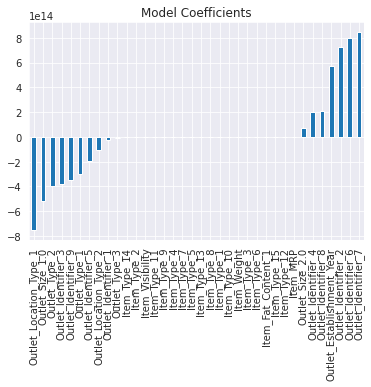

In [ ]:
#plot feature importance
coef.plot(kind='bar',title='Model Coefficients')

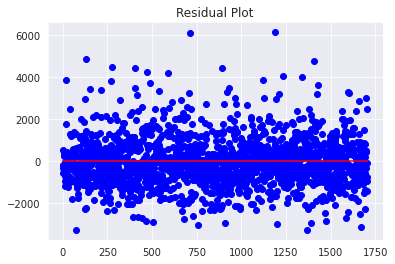

In [ ]:
#residual plot
residue=(y_test-y_hat)
x=[i for i in range(1,len(y_hat)+1)]
x_plot=plt.scatter(x,(y_test-y_hat),c='b')
plt.plot(x,[0]*len(y_hat),c='r')
plt.title('Residual Plot')
plt.show()

#**Define Ridge Regression**

In [ ]:
from sklearn.linear_model import  RidgeCV, LassoCV

In [ ]:
#loop over alpha values
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3,3.7, 3.9,6, 10, 30, 60])
ridge.fit(x_train_norm, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

Best alpha : 3.7


In [ ]:
#predict
y_hat=ridge.predict(x_test_norm)

In [ ]:
#print rmse
print('Root Mean Square Error test = ' + str(math.sqrt(metrics.mean_squared_error(y_test, y_hat))))

Root Mean Square Error test = 1138.3309494691084


In [ ]:
#print r2 score
print(metrics.r2_score(y_test,y_hat))

0.548037671531759


In [ ]:
#Get feature importance
coef=pd.Series(reg.coef_,h).sort_values()

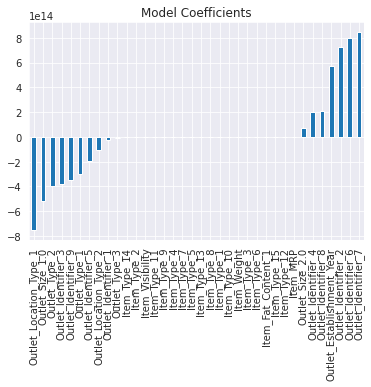

In [ ]:
#get plot
coef.plot(kind='bar',title='Model Coefficients')

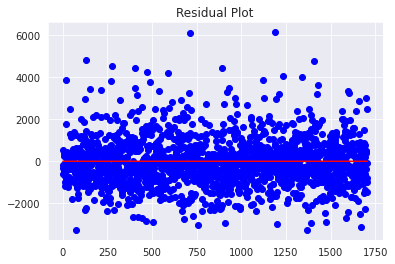

In [ ]:
#residual plot
residue=(y_test-y_hat)
x=[i for i in range(1,len(y_hat)+1)]
x_plot=plt.scatter(x,(y_test-y_hat),c='b')
plt.plot(x,[0]*len(y_hat),c='r')
plt.title('Residual Plot')
plt.show()

#**Define Lasso Regression**

In [ ]:
#loop over alphas
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1,2,2.1,2.2,2.3,2.4,2.5], 
                max_iter = 50000, cv = 10)
lasso.fit(x_train_norm, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

Best alpha : 2.3


In [ ]:
#predict
y_hat=lasso.predict(x_test_norm)

In [ ]:
#print rmse
print('Root Mean Square Error test = ' + str(math.sqrt(metrics.mean_squared_error(y_test, y_hat))))

Root Mean Square Error test = 1137.24421476044


In [ ]:
#print r2 score
print(metrics.r2_score(y_test,y_hat))

0.5489002127800597


In [ ]:
#get feature importance
coef=pd.Series(reg.coef_,h).sort_values()

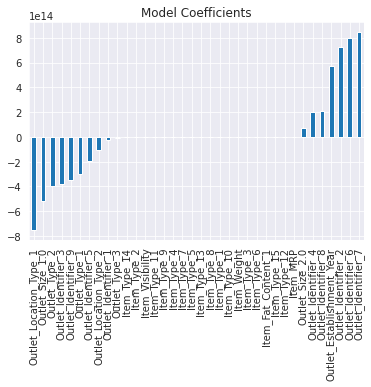

In [ ]:
#get plot
coef.plot(kind='bar',title='Model Coefficients')

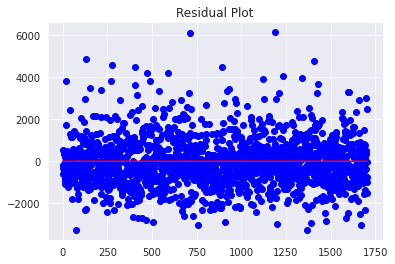

In [ ]:
#residual plot
residue=(y_test-y_hat)
x=[i for i in range(1,len(y_hat)+1)]
x_plot=plt.scatter(x,(y_test-y_hat),c='b')
plt.plot(x,[0]*len(y_hat),c='r')
plt.title('Residual Plot')
plt.show()

#**Conclusion**

* From the analysis we can see that the **lasso regressor** model performs the best in predicting Item Outlet sales
* **Outlet Identifier Year ,Outlet Location Type,Outlet identifier** are the features which contribute to the prediction.

#**Prediction on test**

In [ ]:
#load test
data1=pd.read_csv('Test.csv')

In [ ]:
#print 5 rows
data1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
#print info
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [ ]:
#np.sqrt transformation
data1['Item_Visibility']=np.sqrt(data1['Item_Visibility'])

In [ ]:
#map the catogories to numbers
data1=data1.replace({'Item_Fat_Content':{'Low Fat':0,'Regular':1,'LF':0,'reg':1,'low fat':0}})

In [ ]:
#map the catogories to numbers
data1['Item_Type']= label_encoder.transform(data1['Item_Type']) 

In [ ]:
#map the catogories to numbers
data1['Outlet_Identifier']= label_encoder1.transform(data1['Outlet_Identifier']) 

In [ ]:
#map the catogories to numbers
data1=data1.replace({'Outlet_Size':{'Medium':0,'Small':1,'High':2}})

In [ ]:
#map the catogories to numbers
data1=data1.replace({'Outlet_Location_Type':{'Tier 1':0,'Tier 2':1,'Tier 3':2}})

In [ ]:
#map the catogories to numbers
data1['Outlet_Type']= label_encoder2.transform(data1['Outlet_Type']) 

In [ ]:
data1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,0,0.086976,13,107.8622,9,1999,0.0,0,1
1,FDW14,8.300,1,0.196030,4,87.3198,2,2007,NaN,1,1
2,NCN55,14.600,0,0.315555,11,241.7538,0,1998,NaN,2,0
3,FDQ58,7.315,0,0.124050,13,155.0340,2,2007,NaN,1,1
4,FDY38,NaN,1,0.344383,4,234.2300,5,1985,0.0,2,3


In [ ]:
# missing values in item weights are filled by grouping on item identifier and filling 'nan' with median
data1['Item_Weight']= data1.groupby("Item_Identifier")["Item_Weight"].transform(lambda x: x.fillna(x.median()))

In [ ]:
# missing values in item weights are now filled by grouping on item fat content, item type,outlet identifier and filling 'nan' with median
data1['Item_Weight']= data1.groupby(["Item_Fat_Content","Item_Type","Outlet_Identifier"])["Item_Weight"].transform(
    lambda x: x.fillna(x.mean()))

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   int64  
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   int64  
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   int64  
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   float64
 9   Outlet_Location_Type       5681 non-null   int64  
 10  Outlet_Type                5681 non-null   int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 488.3+ KB


In [ ]:
#fill missing values
data1['Outlet_Size']= data1.groupby(["Outlet_Location_Type","Outlet_Type"])["Outlet_Size"].transform(
    lambda x: x.fillna(x.median()))

In [ ]:
#those are filled by median of outlet type
data1['Outlet_Size']= data1.groupby(["Outlet_Type"])["Outlet_Size"].transform(
    lambda x: x.fillna(x.median()))

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   int64  
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   int64  
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   int64  
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   float64
 9   Outlet_Location_Type       5681 non-null   int64  
 10  Outlet_Type                5681 non-null   int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 488.3+ KB


In [ ]:
categorical=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']

In [ ]:
#get categorical
data12=data1[categorical]

In [ ]:
data12.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0,13,9,0.0,0,1
1,1,4,2,1.0,1,1
2,0,11,0,1.0,2,0
3,0,13,2,1.0,1,1
4,1,4,5,0.0,2,3


In [ ]:
#convert dtype
data3=data12.astype('category')

In [ ]:
data3.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0,13,9,0.0,0,1
1,1,4,2,1.0,1,1
2,0,11,0,1.0,2,0
3,0,13,2,1.0,1,1
4,1,4,5,0.0,2,3


In [ ]:
#get dummies
data2=pd.get_dummies(data3,drop_first=True)

In [ ]:
data2.head()

,Item_Fat_Content_1,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Item_Type_15,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Outlet_Identifier_4,Outlet_Identifier_5,Outlet_Identifier_6,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9,Outlet_Size_1.0,Outlet_Size_2.0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1


In [ ]:
#get numerical
data3=data1.drop(categorical,axis=1)

In [ ]:
#concat ategorical and numerical
data4=pd.concat([data3, data2], axis = 1)

In [ ]:
data4.shape

(5681, 37)

In [ ]:
#drop identifier
data4=data4.drop('Item_Identifier',axis=1)

In [ ]:
data4.shape

(5681, 36)

In [ ]:
#normalize
x_test_norm=scaler.transform(data4)

In [ ]:
#predict using lasso
y_hat=lasso.predict(x_test_norm)

In [ ]:
#store predicted
y_pred_test=pd.DataFrame(y_hat,columns=['Predicted Output'])

In [ ]:
y_pred_test

,Predicted Output
0,1818.366853
1,1558.441682
2,2001.787005
3,2571.977478
4,5165.435922
...,...
5676,2283.321204
5677,2471.451144
5678,1880.143888
5679,3561.220886


**Thank YOU**